# Project Milestone 5 - Merging the Data and Storing in a Database/Visualizing Data

In [2]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect("housing_income_weather.db")
cursor = conn.cursor()

# Drop the table if it exists
DropQueryBostonHousing = "DROP TABLE IF EXISTS BOSTON_HOUSING"
DropQueryWeather = "DROP TABLE IF EXISTS WEATHER"
DropQueryIncome = "DROP TABLE IF EXISTS INCOME"

# Create the table
tables = {
"BOSTON_HOUSING": """
CREATE TABLE BOSTON_HOUSING (
    STREET_NUMBER INTEGER,
    STREET_NAME TEXT NOT NULL,
    CITY TEXT NOT NULL,
    ZIP_CODE TEXT NOT NULL,
    CATEGORY TEXT NOT NULL,
    BUILDING_TYPE TEXT NOT NULL,
    LIVING_AREA INTGER,
    TOTAL_VALUE INTGER,
    YEAR_BUILT INTGER,
    PRICE_PER_SFT INTGER
)
""",
"WEATHER": """
CREATE TABLE WEATHER (
    ZIP_CODE TEXT NOT NULL,
    CITY TEXT NOT NULL,
    AQI_CATEGORY TEXT NOT NULL
)
""",
"INCOME": """
CREATE TABLE INCOME (
    ZIP_CODE TEXT NOT NULL,
    MEDIAN_FAMILY_INCOME INTEGER
)
"""
}

# List of tables to drop
tables_to_drop = ["BOSTON_HOUSING", "WEATHER", "INCOME"]

for table in tables_to_drop:
    cursor.execute(f"DROP TABLE IF EXISTS {table}")

# Execute each CREATE TABLE statement
for table_name, create_query in tables.items():
    cursor.execute(create_query)
    print(f"Table '{table_name}' created successfully")

conn.commit() # Commit changes

Table 'BOSTON_HOUSING' created successfully
Table 'WEATHER' created successfully
Table 'INCOME' created successfully


In [3]:
import csv

# Open CSV file and insert data
with open("housing_data_boston.csv", "r") as file:
    reader = csv.reader(file)
    headers = next(reader)  # Skip header row if present
    
    for row in reader:
        cursor.execute("""
            INSERT INTO BOSTON_HOUSING (STREET_NUMBER, STREET_NAME, CITY, ZIP_CODE, CATEGORY, BUILDING_TYPE, LIVING_AREA, TOTAL_VALUE, YEAR_BUILT, PRICE_PER_SFT)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        """, row)

# Commit and close the connection
conn.commit()

In [4]:
# Open CSV file and insert data
with open("weather_data.csv", "r") as file:
    reader = csv.reader(file)
    headers = next(reader)  # Skip header row if present
    
    for row in reader:
        cursor.execute("""
            INSERT INTO WEATHER (ZIP_CODE, CITY, AQI_CATEGORY)
            VALUES (?, ?, ?)
        """, row)

# Commit and close the connection
conn.commit()

In [5]:
# Open CSV file and insert data
with open("income_data.csv", "r") as file:
    reader = csv.reader(file)
    headers = next(reader)  # Skip header row if present
    
    for row in reader:
        cursor.execute("""
            INSERT INTO INCOME (ZIP_CODE, MEDIAN_FAMILY_INCOME)
            VALUES (?, ?)
        """, row)

# Commit and close the connection
conn.commit()

In [6]:
# Query to fetch and display all rows
select_query = "SELECT * FROM BOSTON_HOUSING LIMIT 10"

rows = cursor.execute(select_query).fetchall()

print("Data in the BOSTON_HOUSING table:")
for row in rows:
  print(row)

Data in the BOSTON_HOUSING table:
(243, 'LEXINGTON ST', 'East Boston', '2128', 'Single Fam Dwelling', 'Cl - Colonial', 1122, 388100, 1910, 345)
(33, 'PRESCOTT ST', 'East Boston', '2128', 'Single Fam Dwelling', 'Cl - Colonial', 1968, 530800, 1900, 269)
(246, 'PRINCETON ST', 'East Boston', '2128', 'Single Fam Dwelling', 'Cp - Cape', 1110, 533600, 1920, 480)
(112, 'PUTNAM ST', 'East Boston', '2128', 'Single Fam Dwelling', 'Cl - Colonial', 1648, 715400, 1900, 434)
(110, 'PUTNAM ST', 'East Boston', '2128', 'Single Fam Dwelling', 'Cl - Colonial', 1816, 763900, 1900, 420)
(1, 'LAWSON PL', 'East Boston', '2128', 'Single Fam Dwelling', 'Cl - Colonial', 1798, 567000, 1905, 315)
(426, 'SARATOGA ST', 'East Boston', '2128', 'Single Fam Dwelling', 'Cl - Colonial', 1197, 620300, 1860, 518)
(289, 'LEXINGTON ST', 'East Boston', '2128', 'Single Fam Dwelling', 'Sd - Semi-Det', 1255, 447000, 1900, 356)
(303, 'LEXINGTON ST', 'East Boston', '2128', 'Single Fam Dwelling', 'Cv - Conventional', 1414, 593800, 1

In [7]:
# Query to fetch and display all rows
select_query = "SELECT * FROM WEATHER LIMIT 10"

rows = cursor.execute(select_query).fetchall()

print("Data in the WEATHER table:")
for row in rows:
  print(row)

Data in the WEATHER table:
('02110', 'Boston', 'Good')
('02199', 'Boston', 'Good')
('02210', 'Boston', 'Good')
('02109', 'Boston', 'Good')
('02116', 'Boston', 'Good')
('02108', 'Boston', 'Good')
('02114', 'Boston', 'Good')
('02111', 'Boston', 'Good')
('02129', 'Boston', 'Good')
('02467', 'Brookline', 'Good')


In [8]:
# Query to fetch and display all rows
select_query = "SELECT * FROM INCOME LIMIT 10"

rows = cursor.execute(select_query).fetchall()

print("Data in the INCOME table:")
for row in rows:
  print(row)

Data in the INCOME table:
('02110', 196518)
('02199', 146786)
('02210', 223411)
('02109', 162045)
('02116', 134875)
('02108', 153618)
('02114', 169107)
('02111', 88333)
('02129', 98445)
('02467', 148396)


In [9]:
import sqlite3

cursor.execute("""
DROP TABLE IF EXISTS housing_income_weather_data
""")

# Step 1: Create the new table
cursor.execute("""
CREATE TABLE IF NOT EXISTS housing_income_weather_data (
    street_number INTEGER,
    street_name TEXT,
    city TEXT,
    zip_code TEXT,
    category TEXT,
    building_type TEXT,
    living_area INTEGER,
    total_value INTEGER,
    year_built INTEGER,
    price_per_sft INTEGER,
    median_family_income INTEGER,
    aqi_category TEXT
);
""")

# Step 2: Insert the joined data into the new table
insert_query = """
INSERT INTO housing_income_weather_data (
    street_number, street_name, city, zip_code, category, building_type,
    living_area, total_value, year_built, price_per_sft, 
    median_family_income, aqi_category
)
SELECT DISTINCT bh.street_number, bh.street_name, bh.city, i.zip_code,  bh.category, bh.building_type,
    bh.living_area, bh.total_value, bh.year_built, bh.price_per_sft, 
    i.median_family_income, 
    w.aqi_category FROM BOSTON_HOUSING bh, INCOME i, WEATHER w 
WHERE CAST(bh.zip_code AS INTEGER) = CAST(i.zip_code AS INTEGER) 
AND CAST(bh.zip_code AS INTEGER) = CAST(w.zip_code AS INTEGER)
"""

# Execute the query to insert the data
cursor.execute(insert_query)

# Commit changes to the database
conn.commit()

# Verify by selecting all data from the new table
cursor.execute("SELECT * FROM housing_income_weather_data where zip_code='02108'")
rows = cursor.fetchall()
for row in rows:
    print(row)


(8, 'SPRUCE CT', 'Boston', '02108', 'Single Fam Dwelling', 'Sd - Semi-Det', 1140, 1093500, 1900, 959, 153618, 'Good')
(18, 'CEDAR LANE WY', 'Boston', '02108', 'Single Fam Dwelling', 'Re - Row End', 1664, 1764500, 1920, 1060, 153618, 'Good')
(5, 'W CEDAR ST', 'Boston', '02108', 'Single Fam Dwelling', 'Re - Row End', 2322, 1816100, 1899, 781, 153618, 'Good')
(11, 'W CEDAR ST', 'Boston', '02108', 'Single Fam Dwelling', 'Rm - Row Middle', 2884, 2869800, 1900, 994, 153618, 'Good')
(52, 'CEDAR LANE WY', 'Boston', '02108', 'Single Fam Dwelling', 'Rm - Row Middle', 1643, 1559800, 1890, 949, 153618, 'Good')
(102, 'CHESTNUT ST', 'Boston', '02108', 'Single Fam Dwelling', 'Rm - Row Middle', 2924, 2265900, 1855, 774, 153618, 'Good')
(160, 'MT VERNON ST', 'Boston', '02108', 'Single Fam Dwelling', 'Rm - Row Middle', 3849, 2924700, 1890, 759, 153618, 'Good')


In [10]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to SQLite database
conn = sqlite3.connect("housing_income_weather.db")

# Load the data from the joined_data table into a DataFrame
query = "SELECT * FROM housing_income_weather_data"
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

In [11]:
df.shape

(29167, 12)

### Final Dataset

In [13]:
df.head()

,street_number,street_name,city,zip_code,category,building_type,living_area,total_value,year_built,price_per_sft,median_family_income,aqi_category
0,243,LEXINGTON ST,East Boston,02128,Single Fam Dwelling,Cl - Colonial,1122,388100,1910,345,49470,Good
1,33,PRESCOTT ST,East Boston,02128,Single Fam Dwelling,Cl - Colonial,1968,530800,1900,269,49470,Good
2,246,PRINCETON ST,East Boston,02128,Single Fam Dwelling,Cp - Cape,1110,533600,1920,480,49470,Good
3,112,PUTNAM ST,East Boston,02128,Single Fam Dwelling,Cl - Colonial,1648,715400,1900,434,49470,Good
4,110,PUTNAM ST,East Boston,02128,Single Fam Dwelling,Cl - Colonial,1816,763900,1900,420,49470,Good


## Data Visualization

### 1. Histogram

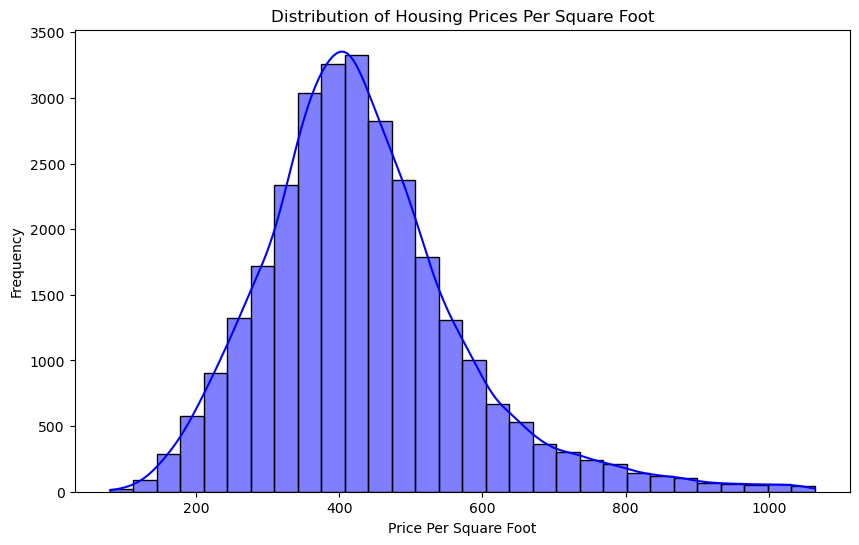

In [16]:
# 1. Distribution of Housing Prices Per Square Foot
# This histogram shows the distribution of price_per_sft, helping to identify price trends.

plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sft'], bins=30, kde=True, color='blue')
plt.xlabel("Price Per Square Foot")
plt.ylabel("Frequency")
plt.title("Distribution of Housing Prices Per Square Foot")
plt.show()

### 2. Pie Chart

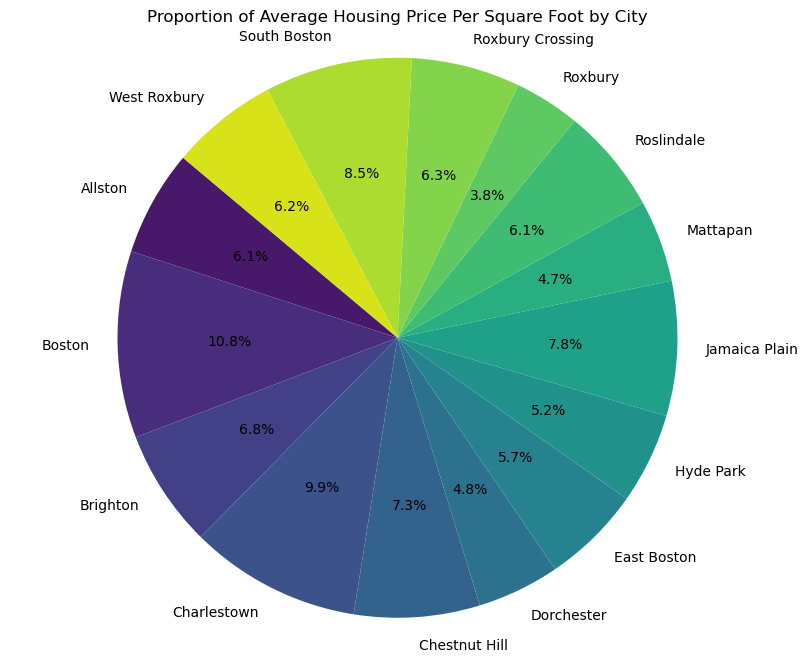

In [18]:
# 2. Average Housing Price Per Square Foot by City (Single Source: BOSTON_HOUSING)
# This pie chart highlights differences in housing costs across cities.

avg_price_per_city = df.groupby("city")["price_per_sft"].mean()
plt.figure(figsize=(10, 8))
plt.pie(avg_price_per_city.values, labels=avg_price_per_city.index, autopct='%1.1f%%', 
        colors=sns.color_palette("viridis", len(avg_price_per_city)), startangle=140)
plt.title("Proportion of Average Housing Price Per Square Foot by City")
plt.axis("equal")
plt.show()

### 3. Scatter Plot (Multi-source: BOSTON_HOUSING + INCOME)

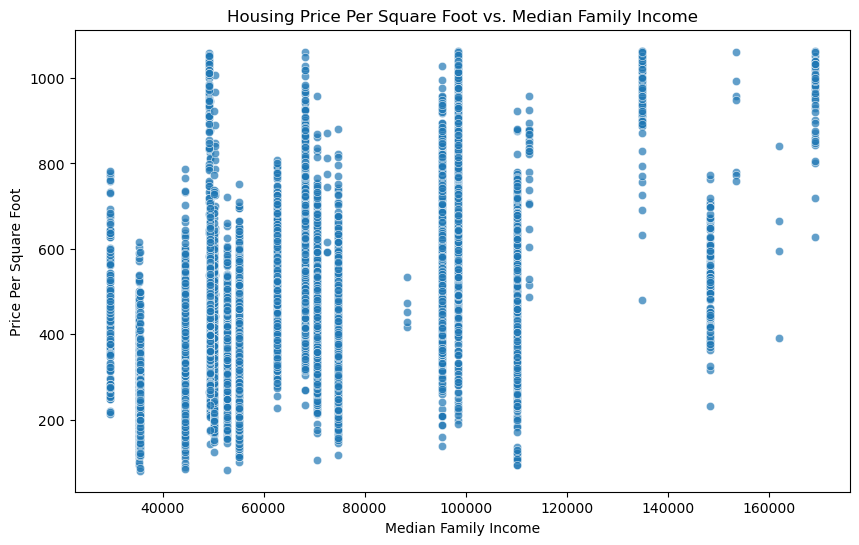

In [20]:
# 3. Median Family Income vs. Housing Price Per Square Foot (Multi-source: BOSTON_HOUSING + INCOME)
# This scatter plot visualizes the relationship between income and housing affordability.

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['median_family_income'], y=df['price_per_sft'], alpha=0.7)
plt.xlabel("Median Family Income")
plt.ylabel("Price Per Square Foot")
plt.title("Housing Price Per Square Foot vs. Median Family Income")
plt.show()

### 4. Box Plot (Multi-source: BOSTON_HOUSING + WEATHER)

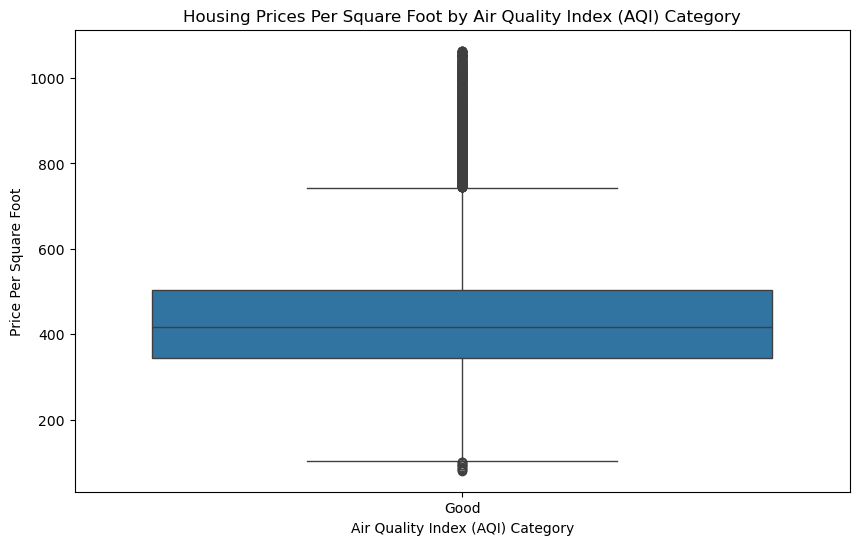

In [22]:
# 4. Housing Prices Per Square Foot by AQI Category (Multi-source: BOSTON_HOUSING + WEATHER)
# This box plot shows how air quality correlates with housing prices.

plt.figure(figsize=(10, 6))
sns.boxplot(x="aqi_category", y="price_per_sft", data=df)
plt.xlabel("Air Quality Index (AQI) Category")
plt.ylabel("Price Per Square Foot")
plt.title("Housing Prices Per Square Foot by Air Quality Index (AQI) Category")
plt.show()

### 5. Bar Chart (Multi-source: INCOME + BOSTON_HOUSING)

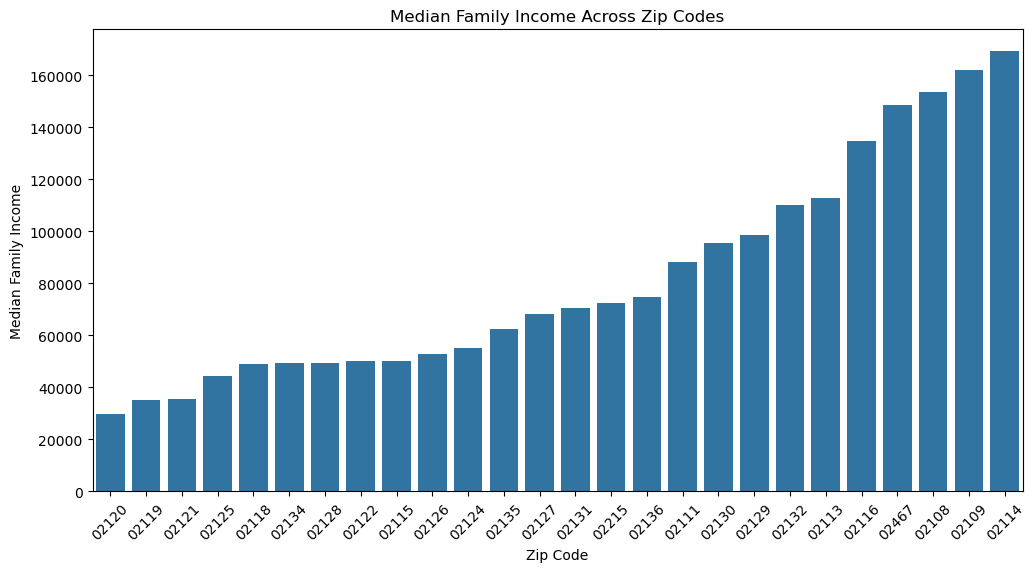

In [24]:
# 5. Income Levels Across Different Zip Codes (Multi-source: INCOME + BOSTON_HOUSING)
# This bar chart compares median family income across different zip codes.

income_per_zip = df.groupby("zip_code")["median_family_income"].mean().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=income_per_zip.index, y=income_per_zip.values)
plt.xlabel("Zip Code")
plt.ylabel("Median Family Income")
plt.title("Median Family Income Across Zip Codes")
plt.xticks(rotation=45)
plt.show()